# Plots

In [1]:
import matplotlib.transforms as transforms
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
from skimage import metrics
from math import pi
import numpy as np
import os

In [3]:
## Loading all 4 generations of Predicted and Ground Truth validaiton dataset of Model 2
path = os.path.abspath('..')

GT_G0,  PD_G0  = np.load(path+'/Step_3_predictions/model_2_results/GEN-0.npy',) # allow_pickle=True)
GT_G1,  PD_G1  = np.load(path+'/Step_3_predictions/model_2_results/GEN-1.npy',) # allow_pickle=True)
GT_G2,  PD_G2  = np.load(path+'/Step_3_predictions/model_2_results/GEN-2.npy',) # allow_pickle=True)
GT_G3,  PD_G3  = np.load(path+'/Step_3_predictions/model_2_results/GEN-3.npy',) # allow_pickle=True)



def scale_array(arr):
    arr_min = np.min(arr)  ## Flattens the array and finds the min value inside it
    arr_max = np.max(arr)  ## Flattens the array and finds the max value inside it
    scaled_array = (arr - arr_min) / (arr_max - arr_min) * 255
    scaled_array = scaled_array.astype(np.uint8)
    
    return scaled_array

GT_G0_scaled, PD_G0_scaled = scale_array(GT_G0), scale_array(PD_G0)
GT_G1_scaled, PD_G1_scaled = scale_array(GT_G1), scale_array(PD_G1)
GT_G2_scaled, PD_G2_scaled = scale_array(GT_G2), scale_array(PD_G2)
GT_G3_scaled, PD_G3_scaled = scale_array(GT_G3), scale_array(PD_G3)

# GT_G0.shape, PD_G0.shape, GT_G1.shape, PD_G1.shape, GT_G2.shape, PD_G2.shape, GT_G3.shape, PD_G3.shape

## Shape Index

In [4]:
from scipy import ndimage as ndi
from skimage.feature import shape_index
from skimage.draw import disk
import matplotlib.patheffects as path_effects

[1] https://www.sciencedirect.com/science/article/abs/pii/026288569290076F?via%3Dihub

[2] https://journals.aps.org/prb/abstract/10.1103/PhysRevB.78.024113

The shape index is a single valued measure of local curvature of image microstructure and it is mathematically obtained from the eigen values of the Hessian [1], defined by Koenderink & van Doorn

The blue and magenta marks are points which deviate no more than 0.5 from the desired shape. 
To attenuate noise in the signal, the magenta marks are taken from the shape index (s) after another Gaussian blur pass (yielding s’).

Gaussian Smoothing sigma = 0.5


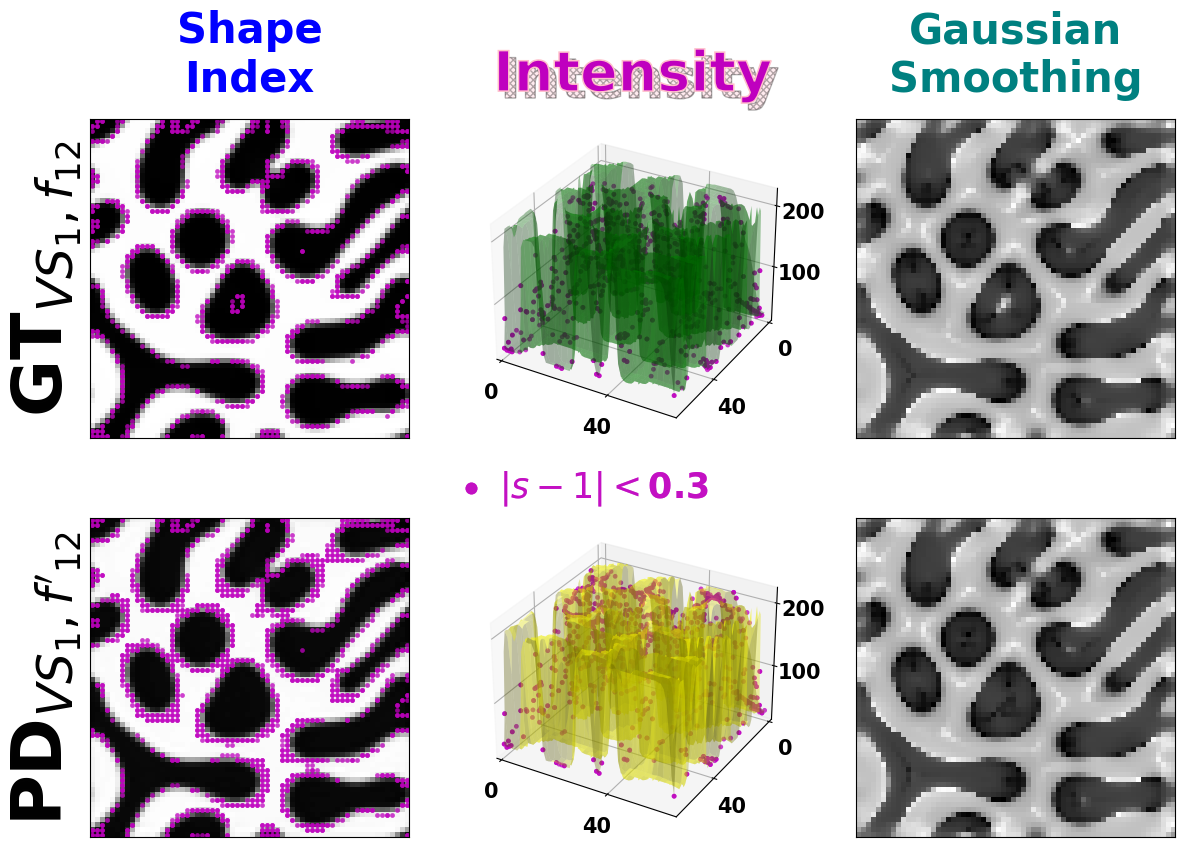

In [4]:

vs = 1
f = 12

VS_F = r"$_{VS_{%s}, f_{%s}}$"%(vs,f)
VS_F_P = r"$_{VS_{%s}, f'_{%s}}$"%(vs,f)

pd_img = PD_G0_scaled[vs,f,:,:,0]
gt_img = GT_G0_scaled[vs,f,:,:,0]

s = shape_index(gt_img)

target = 0
delta = 0.3

point_y, point_x = np.where(np.abs(s - target) < delta)
point_z = gt_img[point_y, point_x]
s_smooth = ndi.gaussian_filter(s, sigma=0.5)
point_y_s, point_x_s = np.where(np.abs(s_smooth - target) < delta)
point_z_s = gt_img[point_y_s, point_x_s]


fig = plt.figure(figsize=(14, 9.5))
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1)


ax1 = fig.add_subplot(2, 3, 1)

ax1.imshow(gt_img, cmap=plt.cm.gray)
ax1.set_title('Shape\nIndex', color="Blue", fontsize=30, weight='bold', pad=20)
ax1.set_ylabel('GT'+VS_F, fontsize=50, weight='bold')
scatter_settings = dict(alpha=0.75, s=12, linewidths=0)
ax1.scatter(point_x, point_y, color='m', **scatter_settings)
ax1.scatter(point_x_s, point_y_s, color='m', **scatter_settings)

ax2 = fig.add_subplot(2, 3, 2, projection='3d', sharex=ax1, sharey=ax1)
x, y = np.meshgrid(np.arange(0, gt_img.shape[0], 1), np.arange(0, gt_img.shape[1], 1))
ax2.plot_surface(x, y, gt_img, linewidth=0, alpha=0.35, color="green")
sp2_0 = ax2.scatter(point_x, point_y, point_z, color='m', label=r'$|s - 1|<$%s'%delta, **scatter_settings)
sp2_1 =ax2.scatter(point_x_s, point_y_s, point_z_s, color='m', label='$|s\' - 1|<$%s'%delta, **scatter_settings)

# legend2_1 = ax2.legend(loc=2, prop={'weight':'bold', 'size':'15'}, markerscale=3, handlelength=0, handles=[sp2_0], labels=[r'$|s - 1|<$%s'%delta],  labelcolor='linecolor', frameon=False)
# legend2_2 = ax2.legend(loc=(-0.05,-0.2),  prop={'weight':'bold', 'size':'25'}, markerscale=2.5, handlelength=0, handles=[sp2_1], labels=['$|s\' - 1|<$%s'%delta],  labelcolor='linecolor', frameon=False)
# ax2.add_artist(legend2_1)

# ax2.axis('off')
ax2.set_title('Intensity', color='m', fontsize=40, weight='bold', pad=20).set_path_effects([ path_effects.PathPatchEffect(offset=(5, -5), hatch='xxxxx', facecolor='pink', alpha=0.3), path_effects.PathPatchEffect(edgecolor='pink', linewidth=1.1, facecolor='m')])

ax3 = fig.add_subplot(2, 3, 3, sharex=ax1, sharey=ax1)
ax3.imshow(s, cmap=plt.cm.gray)
# ax3.axis('off')
ax3.set_title('Gaussian\nSmoothing', color='teal', fontsize=30, weight='bold', pad=20)
# .set_title(r'Shape index, $\sigma=1$')

#############################################################

s = shape_index(pd_img)

target = 0.1
delta = 0.3

point_y, point_x = np.where(np.abs(s - target) < delta)
point_z = pd_img[point_y, point_x]


s_smooth = ndi.gaussian_filter(s, sigma=0.5)

point_y_s, point_x_s = np.where(np.abs(s_smooth - target) < delta)
point_z_s = pd_img[point_y_s, point_x_s]

ax4 = fig.add_subplot(2, 3, 4)

ax4.imshow(pd_img, cmap=plt.cm.gray)
ax4.set_ylabel('PD'+VS_F_P, fontsize=50, weight='bold')
scatter_settings = dict(alpha=0.75, s=12, linewidths=0)
ax4.scatter(point_x, point_y, color='m', **scatter_settings)
ax4.scatter(point_x_s, point_y_s, color='m', **scatter_settings)

ax5 = fig.add_subplot(2, 3, 5, projection='3d', sharex=ax1, sharey=ax1)
x, y = np.meshgrid(np.arange(0, pd_img.shape[0], 1), np.arange(0, pd_img.shape[1], 1))
ax5.plot_surface(x, y, pd_img, linewidth=0, alpha=0.35, color="yellow")
sp5_0 = ax5.scatter(point_x, point_y, point_z, color='m', label=r'$|s - 1|<$%s'%delta, **scatter_settings)
sp5_1 = ax5.scatter(point_x_s, point_y_s, point_z_s, color='m', label='$|s\' - 1|<$%s'%delta, **scatter_settings)

legend5_1 = ax5.legend(loc=(-0.05,0.99), prop={'weight':'bold', 'size':'25'}, markerscale=2.5, handlelength=0, handles=[sp5_0], labels=[r'$|s - 1|<$%s'%delta],  labelcolor='linecolor', frameon=False)
# legend5_2 = ax5.legend(loc=(0,0.95), prop={'weight':'bold', 'size':'15'}, markerscale=3, handlelength=0, handles=[sp5_1], labels=['$|s\' - 1|<$%s'%delta],  labelcolor='linecolor', frameon=False)
ax5.add_artist(legend5_1)

ax6 = fig.add_subplot(2, 3, 6, sharex=ax1, sharey=ax1)
ax6.imshow(s, cmap=plt.cm.gray,)


ax2.xaxis.set_major_locator(plt.MaxNLocator(2))
ax2.yaxis.set_major_locator(plt.MaxNLocator(2))
ax2.zaxis.set_major_locator(plt.MaxNLocator(2))
ax2.xaxis.set_major_locator(plt.MaxNLocator(2))
ax5.yaxis.set_major_locator(plt.MaxNLocator(2))
ax5.zaxis.set_major_locator(plt.MaxNLocator(2))


for label in ax2.get_xticklabels(): label.set_fontweight('bold')
for label in ax2.get_yticklabels(): label.set_fontweight('bold')
for label in ax2.get_zticklabels(): label.set_fontweight('bold')
for label in ax5.get_xticklabels(): label.set_fontweight('bold')
for label in ax5.get_yticklabels(): label.set_fontweight('bold')
for label in ax5.get_zticklabels(): label.set_fontweight('bold') 

ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax2.tick_params(axis='both', labelcolor='black', labelsize=15, bottom=False, top=False, left=False, right=False, labelbottom=True, labelleft=True)
ax3.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax4.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax5.tick_params(axis='both', labelcolor='black', labelsize=15, bottom=False, top=False, left=False, right=False, labelbottom=True, labelleft=True)
ax6.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

# fig.tight_layout()
plt.savefig(path+'/Step_4_quantification/figures_M2/shape_index.png', transparent=True)
plt.show()

## Blobs

In [3]:
from sklearn.model_selection import train_test_split
from math import sqrt
from skimage.feature import blob_dog, blob_log, blob_doh

In [6]:
GT_G0_sam, _, PD_G0_sam, _ = train_test_split(GT_G0, PD_G0, test_size=0.92, random_state=9)  ## Randomly sampling 10 video sequence for further anaylisis from Generation 0
GT_G0_sam_scaled, PD_G0_sam_scaled = scale_array(GT_G0_sam), scale_array(PD_G0_sam)

GT_G1_sam, _, PD_G1_sam, _ = train_test_split(GT_G1, PD_G1, test_size=0.92, random_state=9)  ## Randomly sampling 10 video sequence for further anaylisis from Generation 0
GT_G1_sam_scaled, PD_G1_sam_scaled = scale_array(GT_G1_sam), scale_array(PD_G1_sam)

GT_G2_sam, _, PD_G2_sam, _ = train_test_split(GT_G2, PD_G2, test_size=0.92, random_state=9)  ## Randomly sampling 10 video sequence for further anaylisis from Generation 0
GT_G2_sam_scaled, PD_G2_sam_scaled = scale_array(GT_G2_sam), scale_array(PD_G2_sam)

GT_G3_sam, _, PD_G3_sam, _ = train_test_split(GT_G3, PD_G3, test_size=0.92, random_state=9)  ## Randomly sampling 10 video sequence for further anaylisis from Generation 0
GT_G3_sam_scaled, PD_G3_sam_scaled = scale_array(GT_G3_sam), scale_array(PD_G3_sam)

In [7]:
LoG_GT_G0, LoG_PD_G0, DoG_GT_G0, DoG_PD_G0, ratio_LoG_G0, ratio_DoG_G0 = [], [], [], [], [], []
LoG_GT_G1, LoG_PD_G1, DoG_GT_G1, DoG_PD_G1, ratio_LoG_G1, ratio_DoG_G1 = [], [], [], [], [], []
LoG_GT_G2, LoG_PD_G2, DoG_GT_G2, DoG_PD_G2, ratio_LoG_G2, ratio_DoG_G2 = [], [], [], [], [], []
LoG_GT_G3, LoG_PD_G3, DoG_GT_G3, DoG_PD_G3, ratio_LoG_G3, ratio_DoG_G3 = [], [], [], [], [], []


for vs in range(GT_G0_sam_scaled.shape[0]):
    for f in range(GT_G0_sam_scaled.shape[1]):
        img_gt_G0 = GT_G0_sam_scaled[vs, f,:,:,0]
        img_pd_G0 = PD_G0_sam_scaled[vs, f,:,:,0]
    
        log_gt_G0 = blob_log(img_gt_G0, max_sigma=30, num_sigma=10, threshold=.1)
        log_pd_G0 = blob_log(img_pd_G0, max_sigma=30, num_sigma=10, threshold=.1)
        dog_gt_G0 = blob_dog(img_gt_G0, max_sigma=30, threshold=.1)
        dog_pd_G0 = blob_dog(img_pd_G0, max_sigma=30, threshold=.1)

        LoG_GT_G0.append(log_gt_G0.shape[0]) ## Counting no of blobs for LoG in Ground Truth Image
        LoG_PD_G0.append(log_pd_G0.shape[0]) ## Counting no of blobs for LoG in Predicted Image
        DoG_GT_G0.append(dog_gt_G0.shape[0]) ## Counting no of blobs for DoG in Ground Truth Image
        DoG_PD_G0.append(dog_pd_G0.shape[0]) ## Counting no of blobs for DoG in Predicted Image
        ratio_LoG_G0.append(round(log_pd_G0.shape[0]/log_gt_G0.shape[0] ,2))
        ratio_DoG_G0.append(round(dog_pd_G0.shape[0]/dog_gt_G0.shape[0] ,2))
    
    for f in range(GT_G1_sam_scaled.shape[1]):
        img_gt_G1 = GT_G1_sam_scaled[vs, f,:,:,0]
        img_pd_G1 = PD_G1_sam_scaled[vs, f,:,:,0]
    
        log_gt_G1 = blob_log(img_gt_G1, max_sigma=30, num_sigma=10, threshold=.1)
        log_pd_G1 = blob_log(img_pd_G1, max_sigma=30, num_sigma=10, threshold=.1)
        dog_gt_G1 = blob_dog(img_gt_G1, max_sigma=30, threshold=.1)
        dog_pd_G1 = blob_dog(img_pd_G1, max_sigma=30, threshold=.1)

        LoG_GT_G1.append(log_gt_G1.shape[0]) ## Counting no of blobs for LoG in Ground Truth Image
        LoG_PD_G1.append(log_pd_G1.shape[0]) ## Counting no of blobs for LoG in Predicted Image
        DoG_GT_G1.append(dog_gt_G1.shape[0]) ## Counting no of blobs for DoG in Ground Truth Image
        DoG_PD_G1.append(dog_pd_G1.shape[0]) ## Counting no of blobs for DoG in Predicted Image
        ratio_LoG_G1.append(round(log_pd_G1.shape[0]/log_gt_G1.shape[0] ,2))
        ratio_DoG_G1.append(round(dog_pd_G1.shape[0]/dog_gt_G1.shape[0] ,2))

    for f in range(GT_G2_sam_scaled.shape[1]):
        img_gt_G2 = GT_G2_sam_scaled[vs, f,:,:,0]
        img_pd_G2 = PD_G2_sam_scaled[vs, f,:,:,0]
    
        log_gt_G2 = blob_log(img_gt_G2, max_sigma=30, num_sigma=10, threshold=.1)
        log_pd_G2 = blob_log(img_pd_G2, max_sigma=30, num_sigma=10, threshold=.1)
        dog_gt_G2 = blob_dog(img_gt_G2, max_sigma=30, threshold=.1)
        dog_pd_G2 = blob_dog(img_pd_G2, max_sigma=30, threshold=.1)

        LoG_GT_G2.append(log_gt_G2.shape[0]) ## Counting no of blobs for LoG in Ground Truth Image
        LoG_PD_G2.append(log_pd_G2.shape[0]) ## Counting no of blobs for LoG in Predicted Image
        DoG_GT_G2.append(dog_gt_G2.shape[0]) ## Counting no of blobs for DoG in Ground Truth Image
        DoG_PD_G2.append(dog_pd_G2.shape[0]) ## Counting no of blobs for DoG in Predicted Image
        ratio_LoG_G2.append(round(log_pd_G2.shape[0]/log_gt_G2.shape[0] ,2))
        ratio_DoG_G2.append(round(dog_pd_G2.shape[0]/dog_gt_G2.shape[0] ,2))
        
    for f in range(GT_G3_sam_scaled.shape[1]):
        img_gt_G3 = GT_G3_sam_scaled[vs, f,:,:,0]
        img_pd_G3 = PD_G3_sam_scaled[vs, f,:,:,0]
    
        log_gt_G3 = blob_log(img_gt_G3, max_sigma=30, num_sigma=10, threshold=.1)
        log_pd_G3 = blob_log(img_pd_G3, max_sigma=30, num_sigma=10, threshold=.1)
        dog_gt_G3 = blob_dog(img_gt_G3, max_sigma=30, threshold=.1)
        dog_pd_G3 = blob_dog(img_pd_G3, max_sigma=30, threshold=.1)

        LoG_GT_G3.append(log_gt_G3.shape[0]) ## Counting no of blobs for LoG in Ground Truth Image
        LoG_PD_G3.append(log_pd_G3.shape[0]) ## Counting no of blobs for LoG in Predicted Image
        DoG_GT_G3.append(dog_gt_G3.shape[0]) ## Counting no of blobs for DoG in Ground Truth Image
        DoG_PD_G3.append(dog_pd_G3.shape[0]) ## Counting no of blobs for DoG in Predicted Image
        ratio_LoG_G3.append(round(log_pd_G3.shape[0]/log_gt_G3.shape[0] ,2))
        ratio_DoG_G3.append(round(dog_pd_G3.shape[0]/dog_gt_G3.shape[0] ,2))        

mean_G0, std_G0, var_G0 = np.mean(ratio_LoG_G0), np.std(ratio_LoG_G0), np.var(ratio_LoG_G0)
mean_G1, std_G1, var_G1 = np.mean(ratio_LoG_G1), np.std(ratio_LoG_G1), np.var(ratio_LoG_G1)
mean_G2, std_G2, var_G2 = np.mean(ratio_LoG_G2), np.std(ratio_LoG_G2), np.var(ratio_LoG_G2)
mean_G3, std_G3, var_G3 = np.mean(ratio_LoG_G3), np.std(ratio_LoG_G3), np.var(ratio_LoG_G3)




LoG_GT_G0, LoG_PD_G0, DoG_GT_G0, DoG_PD_G0, ratio_LoG_G0, ratio_DoG_G0 = np.array(LoG_GT_G0), np.array(LoG_PD_G0), np.array(DoG_GT_G0), np.array(DoG_PD_G0), np.array(ratio_LoG_G0), np.array(ratio_DoG_G0) 
LoG_GT_G1, LoG_PD_G1, DoG_GT_G1, DoG_PD_G1, ratio_LoG_G1, ratio_DoG_G1 = np.array(LoG_GT_G1), np.array(LoG_PD_G1), np.array(DoG_GT_G1), np.array(DoG_PD_G1), np.array(ratio_LoG_G1), np.array(ratio_DoG_G1) 
LoG_GT_G2, LoG_PD_G2, DoG_GT_G2, DoG_PD_G2, ratio_LoG_G2, ratio_DoG_G2 = np.array(LoG_GT_G2), np.array(LoG_PD_G2), np.array(DoG_GT_G2), np.array(DoG_PD_G2), np.array(ratio_LoG_G2), np.array(ratio_DoG_G2) 
LoG_GT_G3, LoG_PD_G3, DoG_GT_G3, DoG_PD_G3, ratio_LoG_G3, ratio_DoG_G3 = np.array(LoG_GT_G3), np.array(LoG_PD_G3), np.array(DoG_GT_G3), np.array(DoG_PD_G3), np.array(ratio_LoG_G3), np.array(ratio_DoG_G3) 

mean_LoG_G0, std_LoG_G0, var_LoG_G0 = np.mean(ratio_LoG_G0), np.std(ratio_LoG_G0), np.var(ratio_LoG_G0)
mean_LoG_G1, std_LoG_G1, var_LoG_G1 = np.mean(ratio_LoG_G1), np.std(ratio_LoG_G1), np.var(ratio_LoG_G1)
mean_LoG_G2, std_LoG_G2, var_LoG_G2 = np.mean(ratio_LoG_G2), np.std(ratio_LoG_G2), np.var(ratio_LoG_G2)
mean_LoG_G3, std_LoG_G3, var_LoG_G3 = np.mean(ratio_LoG_G3), np.std(ratio_LoG_G3), np.var(ratio_LoG_G3)

mean_DoG_G0, std_DoG_G0, var_DoG_G0 = np.mean(ratio_DoG_G0), np.std(ratio_DoG_G0), np.var(ratio_DoG_G0)
mean_DoG_G1, std_DoG_G1, var_DoG_G1 = np.mean(ratio_DoG_G1), np.std(ratio_DoG_G1), np.var(ratio_DoG_G1)
mean_DoG_G2, std_DoG_G2, var_DoG_G2 = np.mean(ratio_DoG_G2), np.std(ratio_DoG_G2), np.var(ratio_DoG_G2)
mean_DoG_G3, std_DoG_G3, var_DoG_G3 = np.mean(ratio_DoG_G3), np.std(ratio_DoG_G3), np.var(ratio_DoG_G3)

### Blobs in microstructure

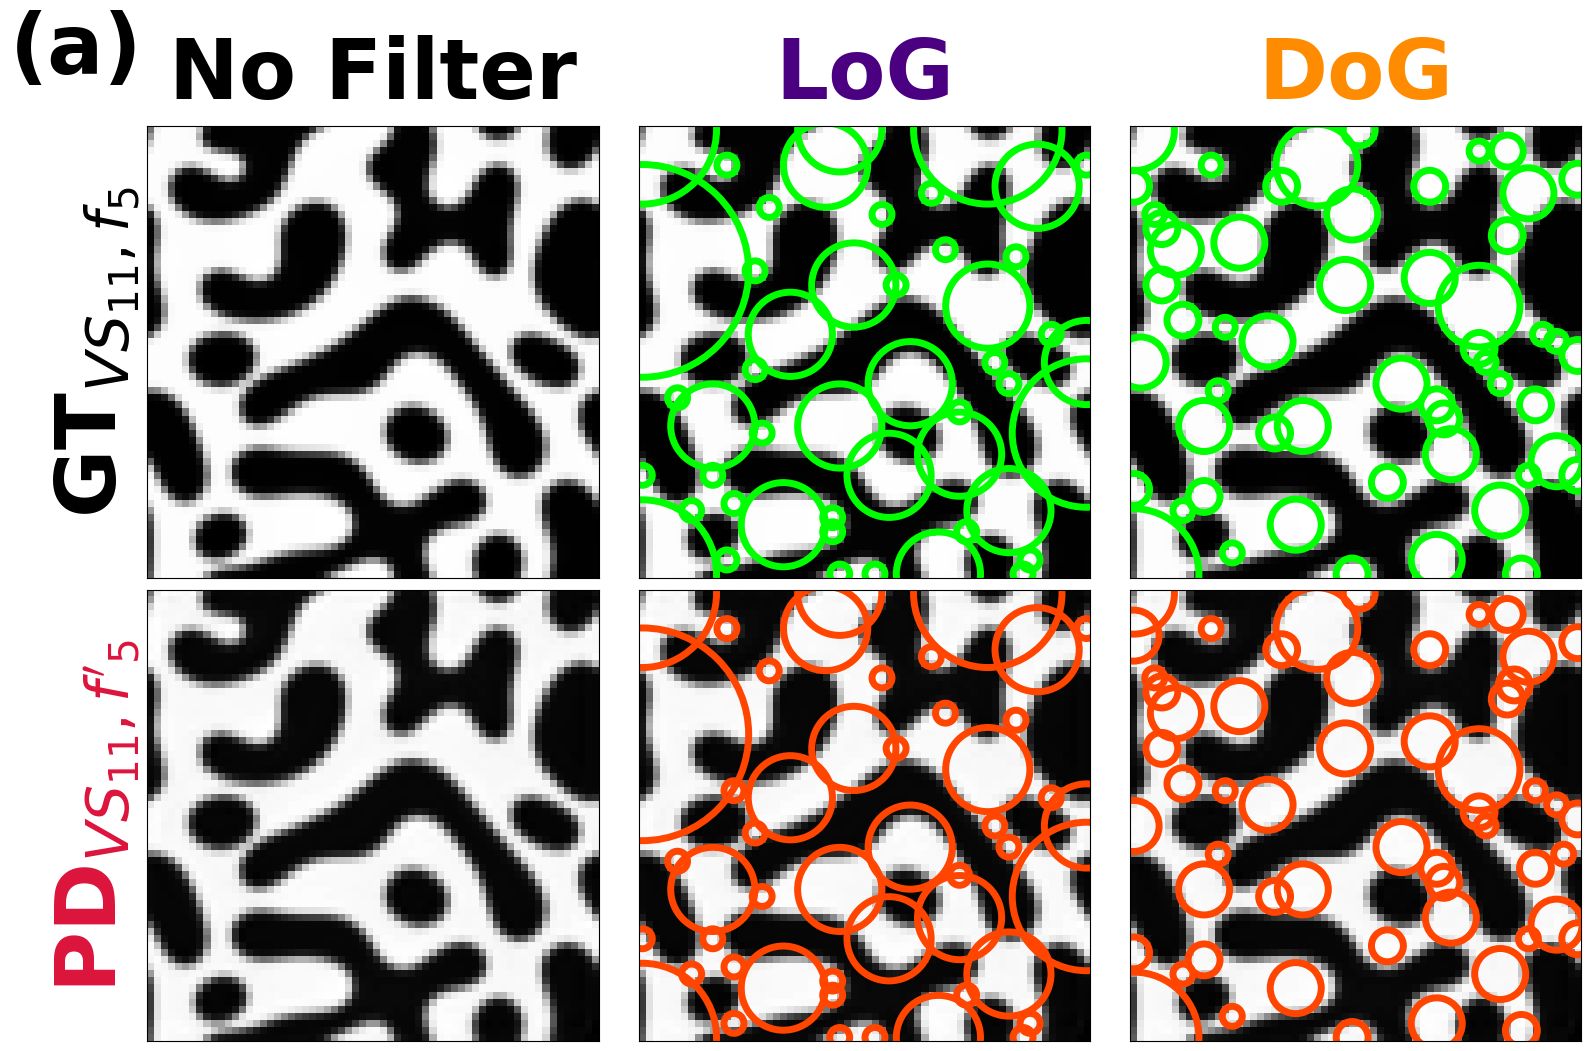

In [8]:
from skimage.feature import blob_dog, blob_log, blob_doh

vs = 11 ## Video sequence no
f = 5  ## Frame 
VS_F = r"$_{VS_{%s}, f_{%s}}$"%(vs,f)
VS_F_P = r"$_{VS_{%s}, f'_{%s}}$"%(vs,f)

img_gt = GT_G0_scaled[vs, f,:,:,0]
img_pd = PD_G0_scaled[vs, f,:,:,0]

log_gt = blob_log(img_gt, max_sigma=30, num_sigma=10, threshold=.1)
log_pd = blob_log(img_pd, max_sigma=30, num_sigma=10, threshold=.1)
log_gt[:, 2] = log_gt[:, 2] * sqrt(2)   # # Compute radii in the 3rd column.
log_pd[:, 2] = log_pd[:, 2] * sqrt(2)

dog_gt = blob_dog(img_gt, max_sigma=30, threshold=.1)
dog_pd = blob_dog(img_pd, max_sigma=30, threshold=.1)
dog_gt[:, 2] = dog_gt[:, 2] * sqrt(2)   # # Compute radii in the 3rd column.
dog_pd[:, 2] = dog_pd[:, 2] * sqrt(2)


plt.rcParams["figure.figsize"] = (16,10.5)

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, )
Algo = ["LoG", "DoG"]

ax1.imshow(img_gt, 'gray')
ax1.set_ylabel('GT'+VS_F, fontsize=60, weight='bold', color = 'k')
ax1.set_title("No Filter", fontsize=60, weight='bold', pad=20)

ax2.imshow(img_gt, 'gray')
ax2.set_title(Algo[0], fontsize=60, weight='bold', pad=20, color ='indigo')

ax3.imshow(img_gt, 'gray')
ax3.set_title(Algo[1], fontsize=60, weight='bold', pad=20, color ='darkorange')

ax4.imshow(img_pd, 'gray')
ax4.set_ylabel('PD'+VS_F_P, fontsize=60, weight='bold', color ='crimson', )
ax5.imshow(img_pd, 'gray')
ax6.imshow(img_pd, 'gray')

ax1.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax2.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax3.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax4.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax5.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax6.tick_params(axis='both', labelcolor='black', labelsize=65, bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

for blob in log_gt:
      y, x, r = blob
      c = plt.Circle((x, y), r, color='lime', linewidth=5, linestyle='-', fill=False)
      ax2.add_patch(c)
for blob in dog_gt:
      y, x, r = blob
      c = plt.Circle((x, y), r, color='lime', linewidth=5, linestyle='-', fill=False)
      ax3.add_patch(c)
for blob in log_pd:
      y, x, r = blob
      c = plt.Circle((x, y), r, color='orangered', linewidth=5, linestyle='-', fill=False)
      ax5.add_patch(c)  
for blob in dog_pd:
      y, x, r = blob
      c = plt.Circle((x, y), r, color='orangered', linewidth=5, linestyle='-', fill=False)
      ax6.add_patch(c)


ax1.text(-20,-8,"(a)", fontsize=60, weight = 'bold', color = 'k')

plt.tight_layout()

plt.savefig(path+'/Step_4_quantification/figures_M2/blobs.png', transparent=True)

plt.show()

### Blob Detection Ratio

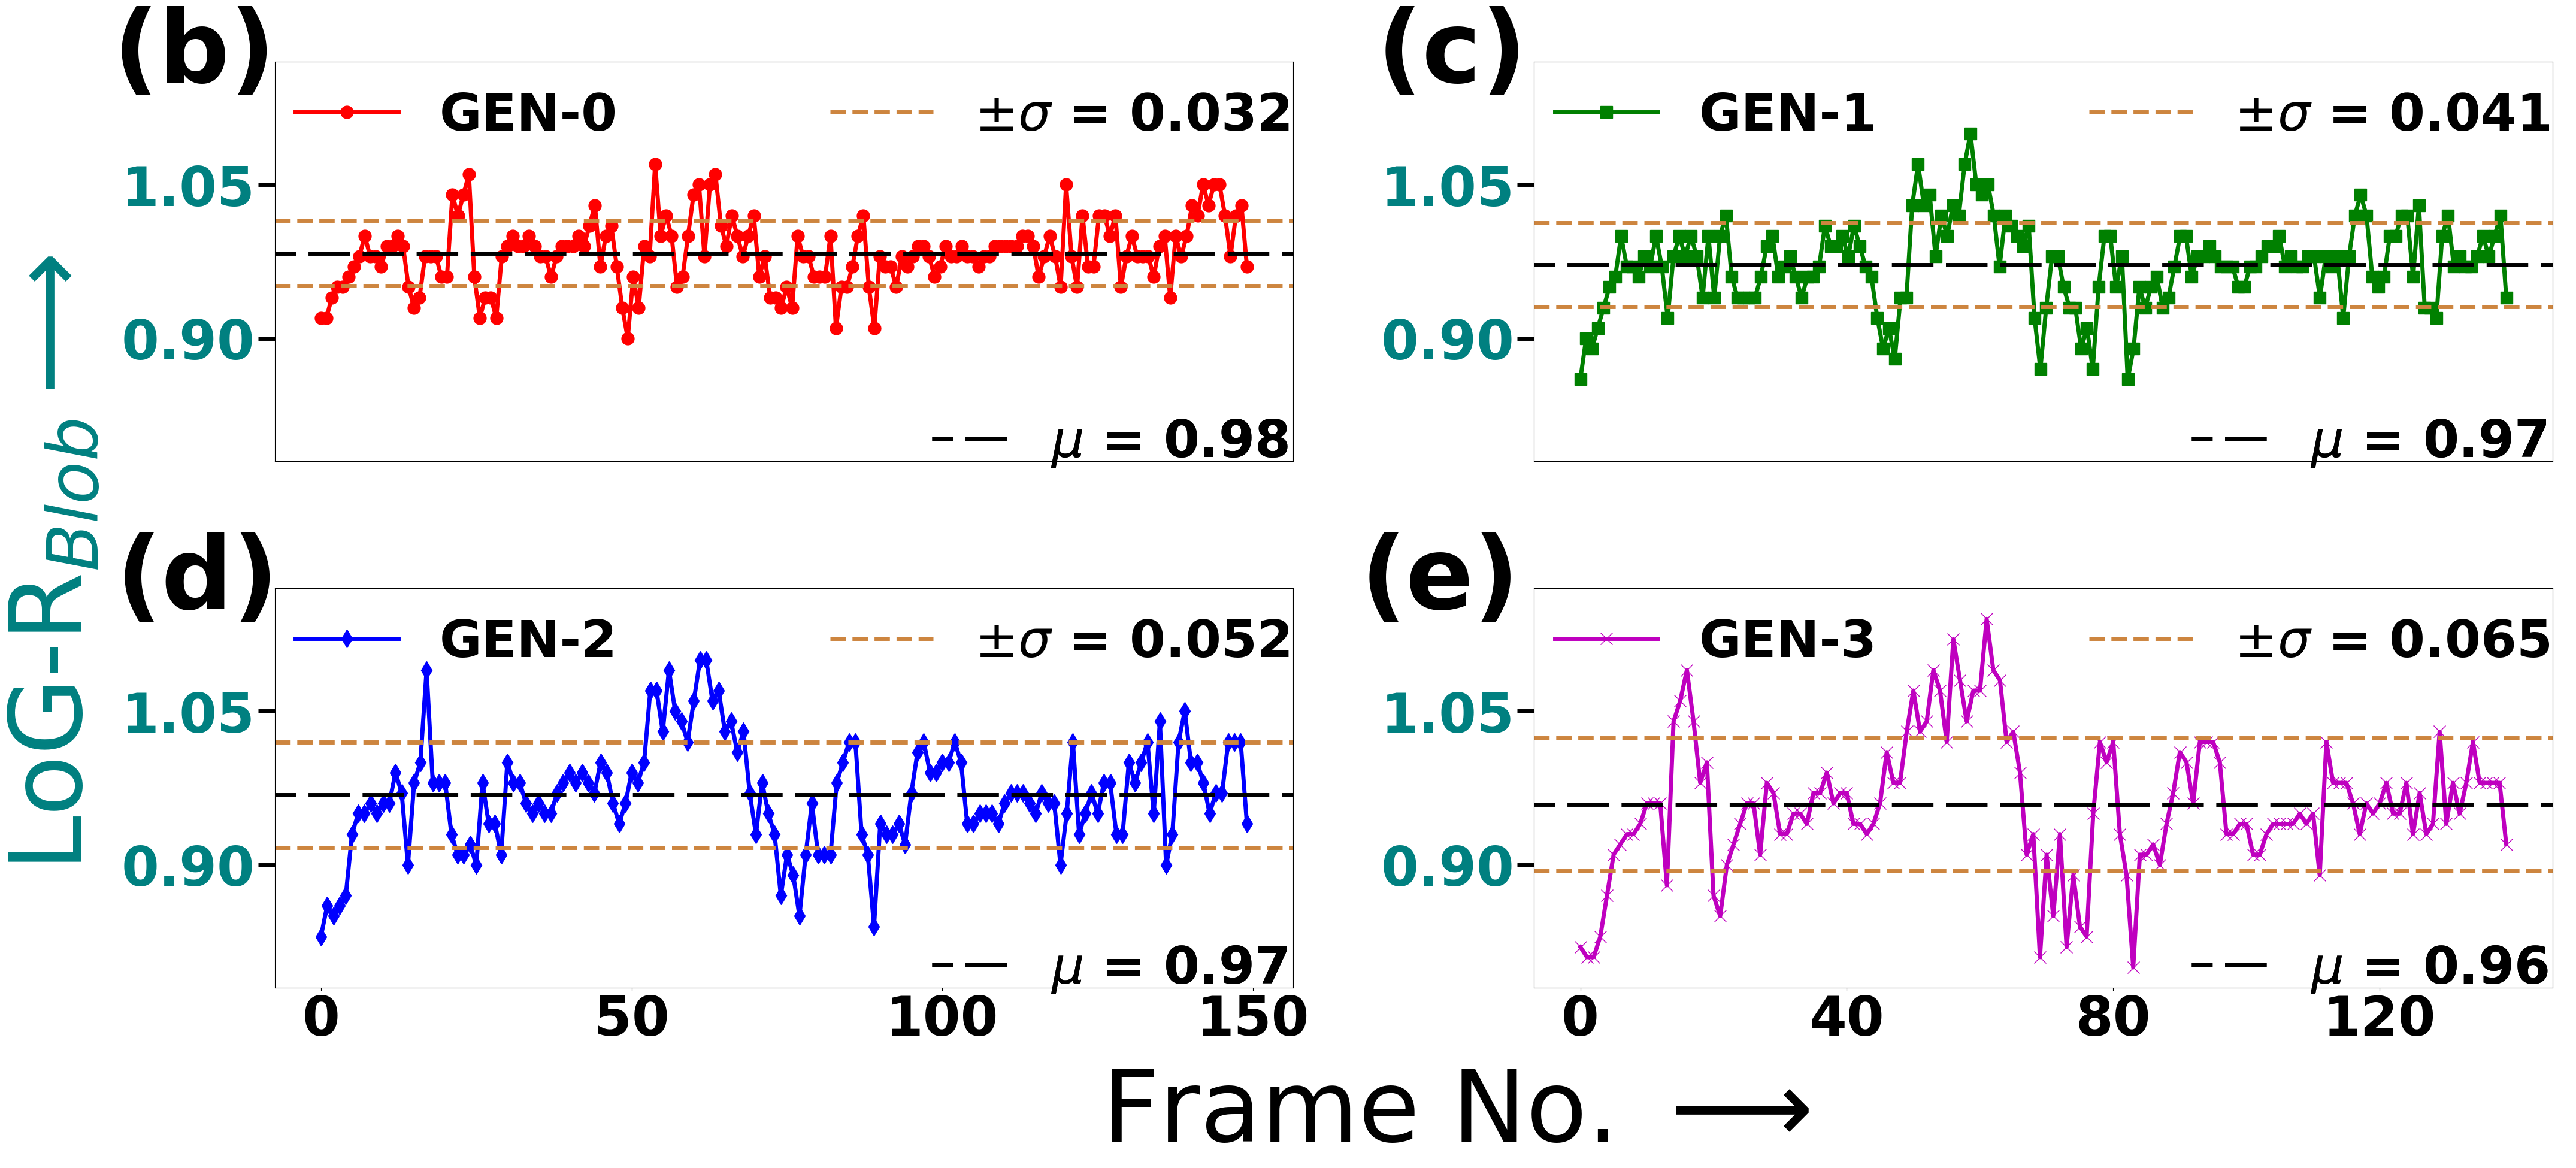

In [10]:
plt.rcParams["figure.figsize"] = (44,20)


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, )
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=95)

fig.supxlabel(x=0.55, y =-0.0, t= r"Frame No. $\longrightarrow$", color='black',  fontsize=120)
fig.supylabel(x=-0.0, y =0.5, t=r'LoG-R$_{Blob} \longrightarrow$', color='teal', size=120)
    

## laplacian is more noise sensetive
x_G0 = range(len(ratio_LoG_G0))

ax1.text(-38,1.15,"(b)", fontsize=120, weight = 'bold', color = 'k')

l0, = ax1.plot(x_G0, ratio_LoG_G0, '-o', color='red', linewidth=5, markersize=15, label='GEN-0')
m0 = ax1.axhline(mean_G0, color='k', linestyle=(5, (10, 3)), label=f'$\mu$ = {round(mean_G0,2)}', linewidth=5)
s0 =ax1.axhline(mean_G0+std_G0, color='peru', linestyle='--', label='$\pm$'+ f'$\sigma$ = {round(std_G0,3)}', linewidth=5)
ax1.axhline(mean_G0-std_G0, color='peru', linestyle='--', linewidth=5)

lines_0   = ax1.get_lines()
legend0_1 = ax1.legend([lines_0[0]], [lines_0[0].get_label()], loc=(0.0,0.75), prop={'weight':'bold', 'size':'62',},  frameon=False)
legend0_2 = ax1.legend([lines_0[1]], [lines_0[1].get_label()], loc=(0.625,-0.07), prop={'weight':'bold', 'size':'62',}, handlelength=1.5, frameon=False)
legend0_3 = ax1.legend([lines_0[2]], [lines_0[2].get_label()], loc=(0.525,0.75), prop={'weight':'bold', 'size':'62',},  frameon=False)
ax1.add_artist(legend0_1)
ax1.add_artist(legend0_2)
ax1.add_artist(legend0_2)


ax1.tick_params(axis='y', labelcolor='teal', labelsize=65, length=20, width=5, )
ax1.tick_params(axis='x', labelcolor='black', labelsize=65, bottom=False, top=False, labelbottom=False)
ax1.xaxis.set_major_locator(plt.MaxNLocator(4))
ax1.yaxis.set_major_locator(plt.MaxNLocator(3))
ax1.set_ylim([0.78, 1.17])


x_G1 = range(len(ratio_LoG_G1))

ax2.text(-35,1.15,"(c)", fontsize=120, weight = 'bold', color = 'k')

l1, = ax2.plot(x_G1, ratio_LoG_G1, '-s', color='green', markersize=15, linewidth=5, label='GEN-1')
m1 = ax2.axhline(mean_G1, color='k', linestyle=(5, (10, 3)), label=f'$\mu$ = {round(mean_G1,2)}', linewidth=5)
s1 = ax2.axhline(mean_G1+std_G1, color='peru', linestyle='--', label='$\pm$'+ f'$\sigma$ = {round(std_G1,3)}', linewidth=5)
ax2.axhline(mean_G1-std_G1, color='peru', linestyle='--', linewidth=5)

lines_1   = ax2.get_lines()
legend1_1 = ax2.legend([lines_1[0]], [lines_1[0].get_label()], loc=(0.0,0.75), prop={'weight':'bold', 'size':'62',},  frameon=False)
legend1_2 = ax2.legend([lines_1[1]], [lines_1[1].get_label()], loc=(0.625,-0.07), prop={'weight':'bold', 'size':'62',}, handlelength=1.5, frameon=False)
legend1_3 = ax2.legend([lines_1[2]], [lines_1[2].get_label()], loc=(0.525,0.75), prop={'weight':'bold', 'size':'62',},  frameon=False)
ax2.add_artist(legend1_1)
ax2.add_artist(legend1_2)
ax2.add_artist(legend1_2)

ax2.tick_params(axis='y', labelcolor='teal', labelsize=65, length=20, width=5,)
ax2.tick_params(axis='x', labelcolor='black', labelsize=65, bottom=False, top=False, labelbottom=False)
ax2.xaxis.set_major_locator(plt.MaxNLocator(4))
ax2.yaxis.set_major_locator(plt.MaxNLocator(3))
ax2.set_ylim([0.78, 1.17])


x_G2 = range(len(ratio_LoG_G2))
ax3.text(-33,1.15,"(d)", fontsize=120, weight = 'bold', color = 'k')
l2, = ax3.plot(x_G2, ratio_LoG_G2, '-d', markersize=15, color='blue', linewidth=5, label='GEN-2',)

m2= ax3.axhline(mean_G2, color='k', linestyle=(5, (10, 3)), label=f'$\mu$ = {round(mean_G2,2)}', linewidth=5)
s2= ax3.axhline(mean_G2+std_G2, color='peru', linestyle='--', label='$\pm$'+ f'$\sigma$ = {round(std_G2,3)}', linewidth=5)
ax3.axhline(mean_G2-std_G2, color='peru', linestyle='--', linewidth=5)

lines_2   = ax3.get_lines()
legend2_1 = ax3.legend([lines_2[0]], [lines_2[0].get_label()], loc=(0.0,0.75), prop={'weight':'bold', 'size':'62',},  frameon=False)
legend2_2 = ax3.legend([lines_2[1]], [lines_2[1].get_label()], loc=(0.625,-0.07), prop={'weight':'bold', 'size':'62',}, handlelength=1.5, frameon=False)
legend2_3 = ax3.legend([lines_2[2]], [lines_2[2].get_label()], loc=(0.525,0.75), prop={'weight':'bold', 'size':'62',},  frameon=False)
ax3.add_artist(legend2_1)
ax3.add_artist(legend2_2)
ax3.add_artist(legend2_2)


ax3.tick_params(axis='y', labelcolor='teal', labelsize=65, length=20, width=5)
ax3.tick_params(axis='x', labelcolor='black', labelsize=65)
ax3.xaxis.set_major_locator(plt.MaxNLocator(4))
ax3.yaxis.set_major_locator(plt.MaxNLocator(3))
ax3.set_ylim([0.78, 1.17])


x_G3 = range(len(ratio_LoG_G3))
ax4.text(-33,1.15,"(e)", fontsize=120, weight = 'bold', color = 'k')
l3, = ax4.plot(x_G3, ratio_LoG_G3, '-x', markersize=15, color='m', linewidth=5, label='GEN-3')

m3 = ax4.axhline(mean_G3, color='k', linestyle=(5, (10, 3)), label=f'$\mu$ = {round(mean_G3,2)}', linewidth=5)
s3 = ax4.axhline(mean_G3+std_G3, color='peru', linestyle='--', label='$\pm$'+ f'$\sigma$ = {round(std_G3,3)}', linewidth=5)
ax4.axhline(mean_G3-std_G3, color='peru', linestyle='--', linewidth=5)

lines_3   = ax4.get_lines()
legend3_1 = ax4.legend([lines_3[0]], [lines_3[0].get_label()], loc=(0.0,0.75), prop={'weight':'bold', 'size':'62',},   frameon=False)
legend3_2 = ax4.legend([lines_3[1]], [lines_3[1].get_label()], loc=(0.625,-0.07), prop={'weight':'bold', 'size':'62',}, handlelength=1.5, frameon=False)
legend3_3 = ax4.legend([lines_3[2]], [lines_3[2].get_label()], loc=(0.525,0.75), prop={'weight':'bold', 'size':'62',},  frameon=False)
ax4.add_artist(legend3_1)
ax4.add_artist(legend3_2)
ax4.add_artist(legend3_2)

ax4.set_ylim([0.78, 1.17])
ax4.tick_params(axis='y', labelcolor='teal', labelsize=65, length=20, width=5)
ax4.tick_params(axis='x', labelcolor='black', labelsize=65)
ax4.xaxis.set_major_locator(plt.MaxNLocator(4))
ax4.yaxis.set_major_locator(plt.MaxNLocator(3))


for label in ax1.get_yticklabels(): label.set_fontweight('bold')
for label in ax2.get_yticklabels(): label.set_fontweight('bold')
for label in ax3.get_yticklabels(): label.set_fontweight('bold')  
for label in ax4.get_yticklabels(): label.set_fontweight('bold')  
for label in ax3.get_xticklabels(): label.set_fontweight('bold')  
for label in ax4.get_xticklabels(): label.set_fontweight('bold')  

plt.tight_layout()

plt.savefig(path+'/Step_4_quantification/figures_M2/blobs_ratio.png', transparent=True)

plt.show()


## $\mu_{SIM}$ Generational

In [3]:
a, b, c, d, e = GT_G0.shape[0], GT_G0.shape[1], GT_G0.shape[2], GT_G0.shape[3], GT_G0.shape[4] 

## For Individual Image Frames
mse_g0 = np.zeros((a,b))
rmse_g0 = np.zeros((a,b))
psnr_g0 = np.zeros((a,b))
ssim_g0 = np.zeros((a,b))

for i in range(GT_G0_scaled.shape[0]):
  for j in range(GT_G0_scaled.shape[1]):
    mse_g0[i][j] = metrics.mean_squared_error(GT_G0_scaled[i,j,:,:,0], PD_G0_scaled[i,j,:,:,0])
    rmse_g0[i][j] = metrics.normalized_root_mse(GT_G0_scaled[i,j,:,:,0], PD_G0_scaled[i,j,:,:,0])
    psnr_g0[i][j] = metrics.peak_signal_noise_ratio(GT_G0_scaled[i,j,:,:,0], PD_G0_scaled[i,j,:,:,0], data_range=None)
    ssim_g0[i][j] = metrics.structural_similarity(GT_G0_scaled[i,j,:,:,0], PD_G0_scaled[i,j,:,:,0], win_size=3)


## For Individual Video Sequence (17 frames)
mse_g0_vs = np.zeros((a))
rmse_g0_vs = np.zeros((a))
psnr_g0_vs = np.zeros((a))
ssim_g0_vs = np.zeros((a))

for i in range(GT_G0_scaled.shape[0]):
  # for j in range(GT_G0_scaled.shape[1]):
  mse_g0_vs[i] = metrics.mean_squared_error(GT_G0_scaled[i,:,:,:,0], PD_G0_scaled[i,:,:,:,0])
  rmse_g0_vs[i] = metrics.normalized_root_mse(GT_G0_scaled[i,:,:,:,0], PD_G0_scaled[i,:,:,:,0])
  psnr_g0_vs[i] = metrics.peak_signal_noise_ratio(GT_G0_scaled[i,:,:,:,0], PD_G0_scaled[i,:,:,:,0], data_range=None)
  ssim_g0_vs[i] = metrics.structural_similarity(GT_G0_scaled[i,:,:,:,0], PD_G0_scaled[i,:,:,:,0], win_size=3)


mse_g0_all = metrics.mean_squared_error(GT_G0_scaled, PD_G0_scaled)
rmse_g0_all = metrics.normalized_root_mse(GT_G0_scaled, PD_G0_scaled)
psnr_g0_all = metrics.peak_signal_noise_ratio(GT_G0_scaled, PD_G0_scaled, data_range=None)
ssim_g0_all = metrics.structural_similarity(GT_G0_scaled[:,:,:,:,0], PD_G0_scaled[:,:,:,:,0], win_size=3)


In [4]:
a, b, c, d, e = GT_G1.shape[0], GT_G1.shape[1], GT_G1.shape[2], GT_G1.shape[3], GT_G1.shape[4] 

## For Individual Image Frames
mse_g1 = np.zeros((a,b))
rmse_g1 = np.zeros((a,b))
psnr_g1 = np.zeros((a,b))
ssim_g1 = np.zeros((a,b))

for i in range(GT_G1_scaled.shape[0]):
  for j in range(GT_G1_scaled.shape[1]):
    mse_g1[i][j] = metrics.mean_squared_error(GT_G1_scaled[i,j,:,:,0], PD_G1_scaled[i,j,:,:,0])
    rmse_g1[i][j] = metrics.normalized_root_mse(GT_G1_scaled[i,j,:,:,0], PD_G1_scaled[i,j,:,:,0])
    psnr_g1[i][j] = metrics.peak_signal_noise_ratio(GT_G1_scaled[i,j,:,:,0], PD_G1_scaled[i,j,:,:,0], data_range=None)
    ssim_g1[i][j] = metrics.structural_similarity(GT_G1_scaled[i,j,:,:,0], PD_G1_scaled[i,j,:,:,0], win_size=3)

## For Individual Video Sequence (17 frames)
mse_g1_vs = np.zeros((a))
rmse_g1_vs = np.zeros((a))
psnr_g1_vs = np.zeros((a))
ssim_g1_vs = np.zeros((a))

for i in range(GT_G1_scaled.shape[0]):
  # for j in range(GT_G1_scaled.shape[1]):
  mse_g1_vs[i] = metrics.mean_squared_error(GT_G1_scaled[i,:,:,:,0], PD_G1_scaled[i,:,:,:,0])
  rmse_g1_vs[i] = metrics.normalized_root_mse(GT_G1_scaled[i,:,:,:,0], PD_G1_scaled[i,:,:,:,0])
  psnr_g1_vs[i] = metrics.peak_signal_noise_ratio(GT_G1_scaled[i,:,:,:,0], PD_G1_scaled[i,:,:,:,0], data_range=None)
  ssim_g1_vs[i] = metrics.structural_similarity(GT_G1_scaled[i,:,:,:,0], PD_G1_scaled[i,:,:,:,0], win_size=3)


## For ALL Validation set at once
mse_g1_all = metrics.mean_squared_error(GT_G1_scaled, PD_G1_scaled)
rmse_g1_all = metrics.normalized_root_mse(GT_G1_scaled, PD_G1_scaled)
psnr_g1_all = metrics.peak_signal_noise_ratio(GT_G1_scaled, PD_G1_scaled, data_range=None)
ssim_g1_all = metrics.structural_similarity(GT_G1_scaled[:,:,:,:,0], PD_G1_scaled[:,:,:,:,0], win_size=3)


In [5]:
a, b, c, d, e = GT_G2.shape[0], GT_G2.shape[1], GT_G2.shape[2], GT_G2.shape[3], GT_G2.shape[4] 

## For Individual Image Frames
mse_g2 = np.zeros((a,b))
rmse_g2 = np.zeros((a,b))
psnr_g2 = np.zeros((a,b))
ssim_g2 = np.zeros((a,b))

for i in range(GT_G2_scaled.shape[0]):
  for j in range(GT_G2_scaled.shape[1]):
    mse_g2[i][j] = metrics.mean_squared_error(GT_G2_scaled[i,j,:,:,0], PD_G2_scaled[i,j,:,:,0])
    rmse_g2[i][j] = metrics.normalized_root_mse(GT_G2_scaled[i,j,:,:,0], PD_G2_scaled[i,j,:,:,0])
    psnr_g2[i][j] = metrics.peak_signal_noise_ratio(GT_G2_scaled[i,j,:,:,0], PD_G2_scaled[i,j,:,:,0], data_range=None)
    ssim_g2[i][j] = metrics.structural_similarity(GT_G2_scaled[i,j,:,:,0], PD_G2_scaled[i,j,:,:,0], win_size=3)


## For Individual Video Sequence (17 frames)
mse_g2_vs = np.zeros((a))
rmse_g2_vs = np.zeros((a))
psnr_g2_vs = np.zeros((a))
ssim_g2_vs = np.zeros((a))

for i in range(GT_G2_scaled.shape[0]):
  # for j in range(GT_G2_scaled.shape[1]):
  mse_g2_vs[i] = metrics.mean_squared_error(GT_G2_scaled[i,:,:,:,0], PD_G2_scaled[i,:,:,:,0])
  rmse_g2_vs[i] = metrics.normalized_root_mse(GT_G2_scaled[i,:,:,:,0], PD_G2_scaled[i,:,:,:,0])
  psnr_g2_vs[i] = metrics.peak_signal_noise_ratio(GT_G2_scaled[i,:,:,:,0], PD_G2_scaled[i,:,:,:,0], data_range=None)
  ssim_g2_vs[i] = metrics.structural_similarity(GT_G2_scaled[i,:,:,:,0], PD_G2_scaled[i,:,:,:,0], win_size=3)

## For ALL Validation set at once
mse_g2_all = metrics.mean_squared_error(GT_G2_scaled, PD_G2_scaled)
rmse_g2_all = metrics.normalized_root_mse(GT_G2_scaled, PD_G2_scaled)
psnr_g2_all = metrics.peak_signal_noise_ratio(GT_G2_scaled, PD_G2_scaled, data_range=None)
ssim_g2_all = metrics.structural_similarity(GT_G2_scaled[:,:,:,:,0], PD_G2_scaled[:,:,:,:,0], win_size=3)


In [6]:
a, b, c, d, e = GT_G3.shape[0], GT_G3.shape[1], GT_G3.shape[2], GT_G3.shape[3], GT_G3.shape[4] 

## For Individual Image Frames
mse_g3 = np.zeros((a,b))
rmse_g3 = np.zeros((a,b))
psnr_g3 = np.zeros((a,b))
ssim_g3 = np.zeros((a,b))

for i in range(GT_G3_scaled.shape[0]):
  for j in range(GT_G3_scaled.shape[1]):
    mse_g3[i][j] = metrics.mean_squared_error(GT_G3_scaled[i,j,:,:,0], PD_G3_scaled[i,j,:,:,0])
    rmse_g3[i][j] = metrics.normalized_root_mse(GT_G3_scaled[i,j,:,:,0], PD_G3_scaled[i,j,:,:,0])
    psnr_g3[i][j] = metrics.peak_signal_noise_ratio(GT_G3_scaled[i,j,:,:,0], PD_G3_scaled[i,j,:,:,0], data_range=None)
    ssim_g3[i][j] = metrics.structural_similarity(GT_G3_scaled[i,j,:,:,0], PD_G3_scaled[i,j,:,:,0], win_size=3)

## For Individual Video Sequence (17 frames)
mse_g3_vs = np.zeros((a))
rmse_g3_vs = np.zeros((a))
psnr_g3_vs = np.zeros((a))
ssim_g3_vs = np.zeros((a))

for i in range(GT_G3_scaled.shape[0]):
  # for j in range(GT_G3_scaled.shape[1]):
  mse_g3_vs[i] = metrics.mean_squared_error(GT_G3_scaled[i,:,:,:,0], PD_G3_scaled[i,:,:,:,0])
  rmse_g3_vs[i] = metrics.normalized_root_mse(GT_G3_scaled[i,:,:,:,0], PD_G3_scaled[i,:,:,:,0])
  psnr_g3_vs[i] = metrics.peak_signal_noise_ratio(GT_G3_scaled[i,:,:,:,0], PD_G3_scaled[i,:,:,:,0], data_range=None)
  ssim_g3_vs[i] = metrics.structural_similarity(GT_G3_scaled[i,:,:,:,0], PD_G3_scaled[i,:,:,:,0], win_size=3)

## For ALL Validation set at once
mse_g3_all = metrics.mean_squared_error(GT_G3_scaled, PD_G3_scaled)
rmse_g3_all = metrics.normalized_root_mse(GT_G3_scaled, PD_G3_scaled)
psnr_g3_all = metrics.peak_signal_noise_ratio(GT_G3_scaled, PD_G3_scaled, data_range=None)
ssim_g3_all = metrics.structural_similarity(GT_G3_scaled[:,:,:,:,0], PD_G3_scaled[:,:,:,:,0], win_size=3)


In [8]:
array_list = [ssim_g0_vs.tolist(), ssim_g1_vs.tolist(), [ssim_g0_all], [ssim_g1_all.tolist()], rmse_g0_vs.tolist(), rmse_g1_vs.tolist(), [rmse_g0_all.tolist()], [rmse_g1_all.tolist()] ]

max_len = max(len(inner_list) for inner_list in array_list)

ssim_rmse_2gens_A2 = np.zeros((len(array_list), max_len), dtype=float)

for i, inner_list in enumerate(array_list):
    ssim_rmse_2gens_A2[i, :len(inner_list)] = inner_list

np.save(path+'/Step_4_quantification/Step_3_best_model_selection/ssim_rmse_2gens_A2.npy', ssim_rmse_2gens_A2)

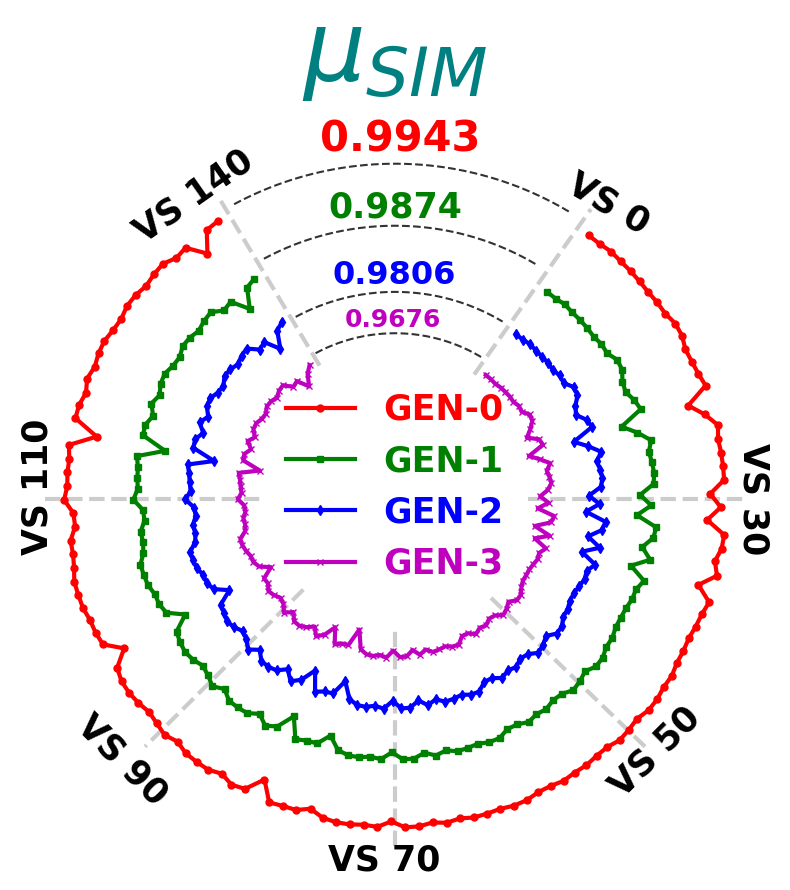

In [8]:
def wrap_around(radii, s,):
    thetas = [i * (330 / len(radii)) for i in range(15, len(radii))]
    xs = [(s * radius * np.sin(np.deg2rad(theta))) for radius, theta in zip(radii, thetas)]
    ys = [(s * radius * np.cos(np.deg2rad(theta))) for radius, theta in zip(radii, thetas)]
    return xs,ys

def labels(radii, s,):
    thetas = [i * (60 / len(radii)) for i in range(-65, len(radii))]
    xs = [(s * radius * np.sin(np.deg2rad(theta))) for radius, theta in zip(radii, thetas)]
    ys = [(s * radius * np.cos(np.deg2rad(theta))) for radius, theta in zip(radii, thetas)]
    return  xs,ys


x0,y0 = wrap_around(ssim_g0_vs, s=20)
x1,y1 = wrap_around(ssim_g1_vs, s=16)
x2,y2 = wrap_around(ssim_g2_vs, s=13)
x3,y3 = wrap_around(ssim_g3_vs, s=10)

a =  np.ones(len(ssim_g0_vs))
l0 = labels(a , 20.25)
l1 = labels(a , 16.5)
l2 = labels(a , 12.5)
l3 = labels(a , 10)
l4 = labels(a , 5)

plt.rcParams["figure.figsize"] = (8,9)

plt.plot([4.75, 11.75], [7.5, 17.5], '--', color = 'black', linewidth=3,  alpha=0.2)
plt.text(10, 16, s="VS 0", color='k',fontsize=25, weight = 'bold', rotation=-30)
plt.hlines(y=0, xmin=8, xmax=21,  color = 'black', linewidth=3, linestyles='dashed', alpha=0.2)
plt.text(20.5, -3, s="VS 30", color='k',fontsize=25, weight = 'bold', rotation=270)
plt.plot([15, 5.5], [-15, -5.75], '--', color = 'black', linewidth=3,  alpha=0.2)
plt.text(12.5, -18, s="VS 50", color='k',fontsize=25, weight = 'bold', rotation=45)
plt.vlines(x=0, ymin=-21, ymax=-8,  color = 'black', linewidth=3, linestyles='dashed', alpha=0.2)
plt.text(-4, -22.5, s="VS 70", color='k',fontsize=25, weight = 'bold', rotation=0)
plt.plot([-5.5, -15], [-5.5, -15], '--', color = 'black', linewidth=3,  alpha=0.2)
plt.text(-19.5, -18.5, s="VS 90", color='k',fontsize=25, weight = 'bold', rotation=-45)
plt.hlines(y=0, xmin=-21, xmax=-8,  color = 'black', linewidth=3, linestyles='dashed', alpha=0.2)
plt.text(-22.5, -3, s="VS 110", color='k',fontsize=25, weight = 'bold', rotation=90)
plt.plot([-10.45, -4.5], [18, 8], '--', color = 'black', linewidth=3,  alpha=0.2)
plt.text(-16, 15.5, s="VS 140", color='k',fontsize=25, weight = 'bold', rotation=35)


plt.plot(x0, y0, '-o', color='red', label=r'GEN-0', linewidth=3, markersize=5)
plt.plot(x1, y1, '-s', color='green', label=r'GEN-1', linewidth=3, markersize=5)
plt.plot(x2, y2, '-d', color='blue', label=r'GEN-2', linewidth=3, markersize=5)
plt.plot(x3, y3, '-x', color='m', label=r'GEN-3', linewidth=3, markersize=5)

l0 = plt.plot(l0[0], l0[1], '--', color = 'black', alpha=0.8)
l1 = plt.plot(l1[0], l1[1], '--', color = 'black', alpha=0.8)
l2 = plt.plot(l2[0], l2[1], '--', color = 'black', alpha=0.8)
l3 = plt.plot(l3[0], l3[1], '--', color = 'black', alpha=0.8)
l4 = plt.plot(l4[0], l4[1], '--', color = 'white', alpha=0)


plt.text(-4.5, 21,  s=f"{ssim_g0_all:.4F}", color='red',fontsize=30, weight = 'bold')
plt.text(-4.0, 17,  s=f"{ssim_g1_all:.4F}", color='green',fontsize=25, weight = 'bold')
plt.text(-3.75, 13, s=f"{ssim_g2_all:.4F}", color='blue',fontsize=23, weight = 'bold')
plt.text(-3, 10.35, s=f"{ssim_g3_all:.4F}", color='m',fontsize=18, weight = 'bold')

plt.legend(loc=(0.34,0.38), prop={'weight':'bold', 'size':'25'}, frameon=False, labelcolor='linecolor').get_frame().set_facecolor('none')

plt.title(r"$\mu_{SIM}$", color='teal',fontsize=70, weight = 'bold', rotation=0, pad=35)

plt.axis(False)
plt.tight_layout()

plt.savefig(path+'/Step_4_quantification/figures_M2/mu_SIM.png', transparent=True)

# plt.grid()
plt.show()



In [ ]:
# def wrap_around(radii, s,):
#     thetas = [i * (330 / len(radii)) for i in range(15, len(radii))]
#     xs = [(s * radius * np.sin(np.deg2rad(theta))) for radius, theta in zip(radii, thetas)]
#     ys = [(s * radius * np.cos(np.deg2rad(theta))) for radius, theta in zip(radii, thetas)]
#     return xs,ys

# def labels(radii, s,):
#     thetas = [i * (60 / len(radii)) for i in range(-65, len(radii))]
#     xs = [(s * radius * np.sin(np.deg2rad(theta))) for radius, theta in zip(radii, thetas)]
#     ys = [(s * radius * np.cos(np.deg2rad(theta))) for radius, theta in zip(radii, thetas)]
#     return  xs,ys


# x0,y0 = wrap_around(ssim_g0_vs, s=20)
# x1,y1 = wrap_around(ssim_g1_vs, s=16)
# x2,y2 = wrap_around(ssim_g2_vs, s=13)
# x3,y3 = wrap_around(ssim_g3_vs, s=10)

# a =  np.ones(len(ssim_g0_vs))
# l0 = labels(a , 20.25)
# l1 = labels(a , 16.5)
# l2 = labels(a , 12.5)
# l3 = labels(a , 10)
# l4 = labels(a , 5)

# plt.rcParams["figure.figsize"] = (8,9.5)

# plt.plot([4.75, 11.75], [7.5, 17.5], '--', color = 'black', linewidth=3,  alpha=0.2)
# plt.text(10, 16, s="VS 0", color='k',fontsize=25, weight = 'bold', rotation=-30)
# plt.hlines(y=0, xmin=8, xmax=21,  color = 'black', linewidth=3, linestyles='dashed', alpha=0.2)
# plt.text(20.5, -3, s="VS 30", color='k',fontsize=25, weight = 'bold', rotation=270)
# plt.plot([15, 5.5], [-15, -5.75], '--', color = 'black', linewidth=3,  alpha=0.2)
# plt.text(12.5, -18, s="VS 50", color='k',fontsize=25, weight = 'bold', rotation=45)
# plt.vlines(x=0, ymin=-21, ymax=-8,  color = 'black', linewidth=3, linestyles='dashed', alpha=0.2)
# plt.text(-4, -22.5, s="VS 70", color='k',fontsize=25, weight = 'bold', rotation=0)
# plt.plot([-5.5, -15], [-5.5, -15], '--', color = 'black', linewidth=3,  alpha=0.2)
# plt.text(-19.5, -18.5, s="VS 90", color='k',fontsize=25, weight = 'bold', rotation=-45)
# plt.hlines(y=0, xmin=-21, xmax=-8,  color = 'black', linewidth=3, linestyles='dashed', alpha=0.2)
# plt.text(-22.5, -3, s="VS 110", color='k',fontsize=25, weight = 'bold', rotation=90)
# plt.plot([-10.45, -4.5], [18, 8], '--', color = 'black', linewidth=3,  alpha=0.2)
# plt.text(-16, 15.5, s="VS 140", color='k',fontsize=25, weight = 'bold', rotation=35)


# plt.plot(x0, y0, '-o', color='red', label=r'GEN-0', linewidth=3, markersize=5)
# plt.plot(x1, y1, '-s', color='green', label=r'GEN-1', linewidth=3, markersize=5)
# plt.plot(x2, y2, '-d', color='blue', label=r'GEN-2', linewidth=3, markersize=5)
# plt.plot(x3, y3, '-x', color='m', label=r'GEN-3', linewidth=3, markersize=5)

# l0 = plt.plot(l0[0], l0[1], '--', color = 'black', alpha=0.8)
# l1 = plt.plot(l1[0], l1[1], '--', color = 'black', alpha=0.8)
# l2 = plt.plot(l2[0], l2[1], '--', color = 'black', alpha=0.8)
# l3 = plt.plot(l3[0], l3[1], '--', color = 'black', alpha=0.8)
# l4 = plt.plot(l4[0], l4[1], '--', color = 'white', alpha=0)


# plt.text(-4.5, 21,  s=f"{ssim_g0_all:.4F}", color='red',fontsize=30, weight = 'bold')
# plt.text(-4.0, 17,  s=f"{ssim_g1_all:.4F}", color='green',fontsize=25, weight = 'bold')
# plt.text(-3.75, 13, s=f"{ssim_g2_all:.4F}", color='blue',fontsize=23, weight = 'bold')
# plt.text(-3, 10.35, s=f"{ssim_g3_all:.4F}", color='m',fontsize=18, weight = 'bold')

# plt.legend(loc=(0.34,0.38), prop={'weight':'bold', 'size':'25'}, frameon=False, labelcolor='linecolor').get_frame().set_facecolor('none')

# plt.title(r"$\mu_{SIM}$", color='teal',fontsize=70, weight = 'bold', rotation=0, pad=35)
# plt.suptitle(r"3 Frames I/P",  color='brown',fontsize=40, weight = 'bold', rotation=0,)

# plt.axis(False)
# plt.tight_layout()

# plt.savefig(path+'/Step_4_quantification/figures_M2/mu_SIM_A2.png', transparent=True)

# # plt.grid()
# plt.show()



## Histogram

https://scikit-image.org/docs/stable/auto_examples/applications/plot_coins_segmentation.html#sphx-glr-auto-examples-applications-plot-coins-segmentation-py

In [2]:
from matplotlib.patches import Circle

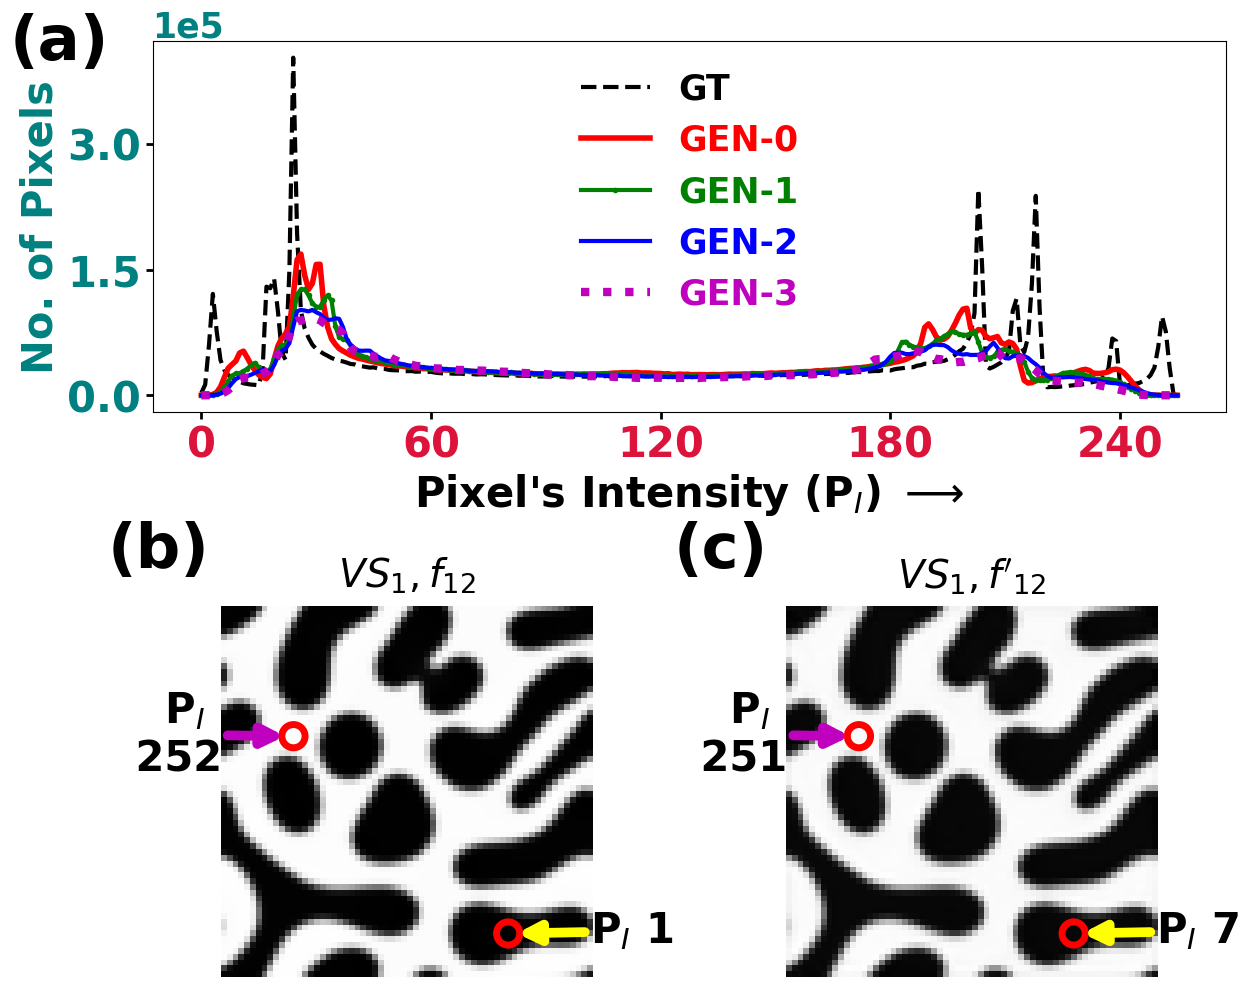

In [18]:
vs = 1
f = 12

# VS_F = r"$_{VS_{%s}, f_{%s}}$"%(vs,f)
# VS_F_P = r"$_{VS_{%s}, f'_{%s}}$"%(vs,f)

pd_img = scale_array(PD_G0[vs,f,:,:,0])
gt_img = scale_array(GT_G0[vs,f,:,:,0])

pd_arr = scale_array(PD_G0[:,:,:,:,0])
gt_arr = scale_array(GT_G0[:,:,:,:,0])

from skimage.exposure import histogram

hist_gt, hist_centers_gt = histogram(GT_G0_scaled)
hist_g0, hist_centers_g0 = histogram(PD_G0_scaled)
hist_g1, hist_centers_g1 = histogram(PD_G1_scaled)
hist_g2, hist_centers_g2 = histogram(PD_G2_scaled)
hist_g3, hist_centers_g3 = histogram(PD_G3_scaled)

fig = plt.figure(figsize=(12.5, 10)) 
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1)


ax1 = fig.add_subplot(2, 1, 1) # column 1 and 2, row 1
ax2 = fig.add_subplot(2, 2, 3) # column 1, row 2
ax3 = fig.add_subplot(2, 2, 4) # column 2, row 2


ax1.plot(hist_centers_gt, hist_gt, '--',  lw=3, color='black', label='GT')
ax1.plot(hist_centers_g0, hist_g0,  lw=4, color="red", label='GEN-0')
ax1.plot(hist_centers_g1, hist_g1, 'o-', markersize=3, lw=3, color="green", label='GEN-1')
ax1.plot(hist_centers_g2, hist_g2, lw=3, color="blue", label='GEN-2')
ax1.plot(hist_centers_g3, hist_g3, ':', lw=6, color="m", label='GEN-3')

ax1.set_ylabel(r"No. of Pixels", color='teal', size= 30, weight = 'bold')
ax1.set_xlabel("Pixel's Intensity (P$_I$) $\longrightarrow$", size= 30, weight = 'bold')
# ax1.legend(loc=(0.01,0.9), ncols=5, prop={'weight':'bold', 'size':'14'}, labelcolor='linecolor', frameon=False)
ax1.legend(loc=9, ncols=1, prop={'weight':'bold', 'size':'25'}, labelcolor='linecolor', frameon=False)

ax1.tick_params(axis='y', labelcolor='teal', labelsize=30, length=5, width=2, )
ax1.yaxis.set_major_locator(plt.MaxNLocator(4))
ax1.yaxis.offsetText.set_fontsize(25)
ax1.yaxis.offsetText.set_weight('bold')
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0,0),useMathText=False, )

ax1.tick_params(axis='x', labelcolor='crimson', labelsize=30, length=5, width=2, )
ax1.xaxis.set_major_locator(plt.MaxNLocator(5))

for label in ax1.get_yticklabels(): label.set_fontweight('bold')
for label in ax1.get_xticklabels(): label.set_fontweight('bold')


ax2.imshow(gt_img, cmap='gray')

x1 = 0.2
y1 = 0.35

x2 = 0.78
y2 = 0.88

height, width = gt_img.shape[:2] 
pixel_x1 = int(x1 * width)
pixel_y1 = int(y1 * height)
pixel_x2 = int(x2 * width)
pixel_y2 = int(y2 * height)

pixel_value1 = gt_img[pixel_y1, pixel_x1]
pixel_value2 = gt_img[pixel_y2, pixel_x2]

radius = 2
center1 = (pixel_x1, pixel_y1)
center2 = (pixel_x2, pixel_y2)

circle1 = Circle(center1, radius, linestyle='-', linewidth=5, edgecolor='red', facecolor='none')
circle2 = Circle(center2, radius, linestyle='-', linewidth=5, edgecolor='red', facecolor='none')

ax2.add_patch(circle1)
ax2.add_patch(circle2)


angle1 = np.arctan2(pixel_y1 - center1[1], pixel_x1 - center1[0])
angle2 = np.arctan2(pixel_y2 - center2[1], pixel_x2 - center2[0])

start_x1 = center1[0] + radius * np.cos(angle1)
start_y1 = center1[1] + radius * np.sin(angle1)
start_x2 = center2[0] + radius * np.cos(angle2)
start_y2 = center2[1] + radius * np.sin(angle2)

# ax.plot(pixel_x, pixel_y, 'o', markersize=5)
ax2.annotate(f'   P$_I$\n {pixel_value1}', (pixel_x1-1, pixel_y1),
             xytext=(-120, -25), textcoords='offset points', fontsize=30, weight = 'bold', color = 'black',
             arrowprops=dict(arrowstyle="-|>", linewidth=7, connectionstyle="arc3,rad=0", color='m',)
           )

ax2.annotate(f'P$_I$ {pixel_value2}', (pixel_x2+1, pixel_y2),
             xytext=(55, -7), textcoords='offset points', fontsize=30, weight = 'bold',
             arrowprops=dict(arrowstyle="-|>", linewidth=7, connectionstyle="arc3,rad=-0", color='yellow',)
           )

ax3.imshow(pd_img, cmap='gray')

x1 = 0.2
y1 = 0.35

x2 = 0.78
y2 = 0.88

height, width = pd_img.shape[:2] 
pixel_x1 = int(x1 * width)
pixel_y1 = int(y1 * height)
pixel_x2 = int(x2 * width)
pixel_y2 = int(y2 * height)

pixel_value1 = pd_img[pixel_y1, pixel_x1]
pixel_value2 = pd_img[pixel_y2, pixel_x2]

radius = 2
center1 = (pixel_x1, pixel_y1)
center2 = (pixel_x2, pixel_y2)

circle1 = Circle(center1, radius, linestyle='-', linewidth=5, edgecolor='red', facecolor='none')
circle2 = Circle(center2, radius, linestyle='-', linewidth=5, edgecolor='red', facecolor='none')

ax3.add_patch(circle1)
ax3.add_patch(circle2)


angle1 = np.arctan2(pixel_y1 - center1[1], pixel_x1 - center1[0])
angle2 = np.arctan2(pixel_y2 - center2[1], pixel_x2 - center2[0])

start_x1 = center1[0] + radius * np.cos(angle1)
start_y1 = center1[1] + radius * np.sin(angle1)
start_x2 = center2[0] + radius * np.cos(angle2)
start_y2 = center2[1] + radius * np.sin(angle2)

# ax.plot(pixel_x, pixel_y, 'o', markersize=5)
ax3.annotate(f'   P$_I$\n {pixel_value1}', (pixel_x1-1, pixel_y1),
             xytext=(-120, -25), textcoords='offset points', fontsize=30, weight = 'bold', color = 'black',
             arrowprops=dict(arrowstyle="-|>", linewidth=7, connectionstyle="arc3,rad=0", color='m',)
           )

ax3.annotate(f'P$_I$ {pixel_value2}', (pixel_x2+1, pixel_y2),
             xytext=(55, -7), textcoords='offset points', fontsize=30, weight = 'bold',
             arrowprops=dict(arrowstyle="-|>", linewidth=7, connectionstyle="arc3,rad=-0", color='yellow',)
           )

# plt.subplots_adjust(hspace=0.2)

ax2.axis('off')
ax2.set_title(r"$_{VS_{%s}, f_{%s}}$"%(vs,f), fontsize=40, weight='bold', pad=20)

ax3.axis('off')
ax3.set_title(r"$_{VS_{%s}, f'_{%s}}$"%(vs,f), fontsize=40, weight='bold', pad=20)


ax1.text(-50, 4e5, s="(a)", fontsize=45, weight = 'bold', color='k')
ax2.text(-20, -7, "(b)", fontsize=45, weight = 'bold', color='k')
ax3.text(-20, -7, "(c)", fontsize=45, weight = 'bold', color='k')

    
plt.tight_layout()

plt.savefig(path+'/Step_4_quantification/figures_M2/histogram.png', transparent=True)

plt.show()